<a href="https://colab.research.google.com/github/kangmg/OverlayMol/blob/main/test/with_matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size="6" color="skyblue">Visualization with matplotlib package<font>

<font size="5" color="pink">TODO<font>

- save xyz files ( json to xyz format function )
-

In [1]:
#@title setup for interactive plot
!pip install -q ipympl

from google.colab import output
output.enable_custom_widget_manager()


%matplotlib widget

In [2]:
#@title test xyz files
!wget -q https://raw.githubusercontent.com/kangmg/aimDIAS/main/examples/sn2.xyz -O sn2.xyz
!wget -q https://raw.githubusercontent.com/kangmg/OverlayMol/main/examples/DA.xyz -O DA.xyz
!wget -q https://raw.githubusercontent.com/kangmg/OverlayMol/main/examples/butadiene.xyz -O butadiene.xyz

In [3]:
%%writefile sn2_1.xyz
6
 0.000000
  C -1.277168 0.545365 -0.000063
  Br 0.648058 0.543727 0.000199
  H -1.652166 0.593222 1.017641
  H -1.652215 -0.359651 -0.467952
  H -1.651698 1.403205 -0.550042
  Cl -4.402752 0.572053 0.000227

Overwriting sn2_1.xyz


In [4]:
%%writefile sn2_2.xyz
6
 0.000000
  C -1.294919 0.542959 5.001299
  Br 0.694616 0.543808 4.999562
  H -1.636980 0.598072 6.030309
  H -1.637355 -0.369230 4.522183
  H -1.633737 1.408958 4.446127
  Cl -4.352783 0.570770 5.000338

Overwriting sn2_2.xyz


In [5]:
#@title atomic informations


#covalent radii from Alvarez (2008)
#DOI: 10.1039/b801115j
covalent_radii = {
'H': 0.31, 'He': 0.28, 'Li': 1.28,
'Be': 0.96, 'B': 0.84, 'C': 0.76,
'N': 0.71, 'O': 0.66, 'F': 0.57, 'Ne': 0.58,
'Na': 1.66, 'Mg': 1.41, 'Al': 1.21, 'Si': 1.11,
'P': 1.07, 'S': 1.05, 'Cl': 1.02, 'Ar': 1.06,
'K': 2.03, 'Ca': 1.76, 'Sc': 1.70, 'Ti': 1.60,
'V': 1.53, 'Cr': 1.39, 'Mn': 1.61, 'Fe': 1.52,
'Co': 1.50, 'Ni': 1.24, 'Cu': 1.32, 'Zn': 1.22,
'Ga': 1.22, 'Ge': 1.20, 'As': 1.19, 'Se': 1.20,
'Br': 1.20, 'Kr': 1.16, 'Rb': 2.20, 'Sr': 1.95,
'Y': 1.90, 'Zr': 1.75, 'Nb': 1.64, 'Mo': 1.54,
'Tc': 1.47, 'Ru': 1.46, 'Rh': 1.42, 'Pd': 1.39,
'Ag': 1.45, 'Cd': 1.44, 'In': 1.42, 'Sn': 1.39,
'Sb': 1.39, 'Te': 1.38, 'I': 1.39, 'Xe': 1.40,
'Cs': 2.44, 'Ba': 2.15, 'La': 2.07, 'Ce': 2.04,
'Pr': 2.03, 'Nd': 2.01, 'Pm': 1.99, 'Sm': 1.98,
'Eu': 1.98, 'Gd': 1.96, 'Tb': 1.94, 'Dy': 1.92,
'Ho': 1.92, 'Er': 1.89, 'Tm': 1.90, 'Yb': 1.87,
'Lu': 1.87, 'Hf': 1.75, 'Ta': 1.70, 'W': 1.62,
'Re': 1.51, 'Os': 1.44, 'Ir': 1.41, 'Pt': 1.36,
'Au': 1.36, 'Hg': 1.32, 'Tl': 1.45, 'Pb': 1.46,
'Bi': 1.48, 'Po': 1.40, 'At': 1.50, 'Rn': 1.50,
'Fr': 2.60, 'Ra': 2.21, 'Ac': 2.15, 'Th': 2.06,
'Pa': 2.00, 'U': 1.96, 'Np': 1.90, 'Pu': 1.87,
'Am': 1.80, 'Cm': 1.69}


# Ref. https://github.com/dralgroup/mlatom/blob/main/mlatom/data.py
periodic_table = """X
    H                                                                                                                           He
    Li  Be                                                                                                  B   C   N   O   F   Ne
    Na  Mg                                                                                                  Al  Si  P   S   Cl  Ar
    K   Ca  Sc                                                          Ti  V   Cr  Mn  Fe  Co  Ni  Cu  Zn  Ga  Ge  As  Se  Br  Kr
    Rb  Sr  Y                                                           Zr  Nb  Mo  Tc  Ru  Rh  Pd  Ag  Cd  In  Sn  Sb  Te  I   Xe
    Cs  Ba  La  Ce  Pr  Nd  Pm  Sm  Eu  Gd  Tb  Dy  Ho  Er  Tm  Yb  Lu  Hf  Ta  W   Re  Os  Ir  Pt  Au  Hg  Tl  Pb  Bi  Po  At  Rn
    Fr  Ra  Ac  Th  Pa  U   Np  Pu  Am  Cm
""".strip().split()

atomic_number2element_symbol = {k: v for k, v in enumerate(periodic_table)}
element_symbol2atomic_number = {v: k for k, v in atomic_number2element_symbol.items()}


# jmol cpk coloring
# Ref. https://jmol.sourceforge.net/jscolors/
atomic_number2hex = {
'H': '#FFFFFF',   'He': '#D9FFFF',    'Li': '#CC80FF',    'Be': '#C2FF00',
'B': '#FFB5B5',   'C': '#909090',     'N': '#3050F8',   'O': '#FF0D0D',
'F': '#90E050',   'Ne': '#B3E3F5',    'Na': '#AB5CF2',  'Mg': '#8AFF00',
'Al': '#BFA6A6',  'Si': '#F0C8A0',    'P': '#FF8000',   'S': '#FFFF30',
'Cl': '#1FF01F',  'Ar': '#80D1E3',    'K': '#8F40D4',   'Ca': '#3DFF00',
'Sc': '#E6E6E6',  'Ti': '#BFC2C7',    'V': '#A6A6AB',   'Cr': '#8A99C7',
'Mn': '#9C7AC7',  'Fe': '#E06633',    'Co': '#F090A0',  'Ni': '#50D050',
'Cu': '#C88033',  'Zn': '#7D80B0',    'Ga': '#C28F8F',  'Ge': '#668F8F',
'As': '#BD80E3',  'Se': '#FFA100',    'Br': '#A62929',  'Kr': '#5CB8D1',
'Rb': '#702EB0',  'Sr': '#00FF00',    'Y': '#94FFFF',   'Zr': '#94E0E0',
'Nb': '#73C2C9',  'Mo': '#54B5B5',    'Tc': '#3B9E9E',  'Ru': '#248F8F',
'Rh': '#0A7D8C',  'Pd': '#006985',    'Ag': '#C0C0C0',  'Cd': '#FFD98F',
'In': '#A67573',  'Sn': '#668080',    'Sb': '#9E63B5',  'Te': '#D47A00',
'I': '#940094',   'Xe': '#429EB0',    'Cs': '#57178F',  'Ba': '#00C900',
'La': '#70D4FF',  'Ce': '#FFFFC7',    'Pr': '#D9FFC7',  'Nd': '#C7FFC7',
'Pm': '#A3FFC7',  'Sm': '#8FFFC7',    'Eu': '#61FFC7',  'Gd': '#45FFC7',
'Tb': '#30FFC7',  'Dy': '#1FFFC7',    'Ho': '#00FF9C',  'Er': '#00E675',
'Tm': '#00D452',  'Yb': '#00BF38',    'Lu': '#00AB24',  'Hf': '#4DC2FF',
'Ta': '#4DA6FF',  'W': '#2194D6',     'Re': '#267DAB',  'Os': '#266696',
'Ir': '#175487',  'Pt': '#D0D0E0',    'Au': '#FFD123',  'Hg': '#B8B8D0',
'Tl': '#A6544D',  'Pb': '#575961',    'Bi': '#9E4FB5',  'Po': '#AB5C00',
'At': '#754F45',  'Rn': '#428296',    'Fr': '#420066',  'Ra': '#007D00',
'Ac': '#70ABFA',  'Th': '#00BAFF',    'Pa': '#00A1FF',  'U': '#008FFF',
'Np': '#0080FF',  'Pu': '#006BFF',    'Am': '#545CF2',  'Cm': '#785CE3'
}

atomic_number2hex = {element_symbol2atomic_number[symbol]: rgb for symbol, rgb in atomic_number2hex.items()}

In [6]:
#@title import packages

# import sys                                                      #sys.exit
# import os.path                                                  #filename split
# import numpy as np                                              #calculations
# from cycler import cycler                                       #generate color cycle
# from itertools import cycle                                     #for color cycling
# import io                                                       #IO for (easy) saving multi xyz
# import re                                                       #regex (get atom x y z from multi xyz)
from numpy import ndarray
import numpy as np
from os.path import isfile, basename
import re
from collections.abc import Iterable
from copy import deepcopy
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt
from itertools import cycle
from scipy.spatial.distance import pdist, squareform #for the calculations of the distance matrix and angles (cosine)

In [7]:
#@title UDFs


def set_axes_equal(ax)->Axes3D:
    """
    Description
    -----------
    Make axes of 3D plot have equal scale so that spheres appear as spheres,
    cubes as cubes, etc. This is one possible solution to Matplotlib's
    ax.set_aspect('equal') and ax.axis('equal') not working for 3D.

    Parameters
    ----------
    ax : Axes3D
        A Matplotlib 3D axis object.

    Note
    ----
    https://stackoverflow.com/questions/13685386/matplotlib-equal-unit-length-with-equal-aspect-ratio-z-axis-is-not-equal-to
    """
    # Get current limits of the axes
    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    # Calculate ranges and midpoints for each axis
    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_middle = np.mean(z_limits)

    # Calculate the plot radius (half the max range, scaled)
    plot_radius = 0.35 * max([x_range, y_range, z_range])

    # Set new limits for each axis centered around the midpoints
    ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius])
    ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
    ax.set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])


def kabsch(P, Q):
    """
    Description
    -----------
    Compute the optimal rotation matrix using the Kabsch algorithm to align
    two sets of points P and Q.

    Parameters
    ----------
    P : ndarray
        An array of shape (N, 3) representing the first set of points.
    Q : ndarray
        An array of shape (N, 3) representing the second set of points.

    Returns
    -------
    ndarray
        A 3x3 rotation matrix.

    Ref. https://github.com/charnley/rmsd
    """
    # Compute the covariance matrix
    C = np.dot(np.transpose(P), Q)

    # Perform singular value decomposition
    V, S, W = np.linalg.svd(C)

    # Check if a reflection is needed
    d = (np.linalg.det(V) * np.linalg.det(W)) < 0.0
    if d:
        # Adjust the singular values and V matrix if reflection is needed
        S[-1] = -S[-1]
        V[:, -1] = -V[:, -1]

    # Compute the rotation matrix
    U = np.dot(V, W)

    return U


def align_xyz(vec1, vec2, coord)->ndarray:
    """
    Align a set of coordinates by computing the rotation matrix using the Kabsch
    algorithm with two reference vectors and applying it to the coordinates.

    Parameters
    ----------
    vec1 : ndarray
        An array of shape (N, 3) representing the first reference vector.
    vec2 : ndarray
        An array of shape (N, 3) representing the second reference vector.
    coord : ndarray
        An array of shape (M, 3) representing the coordinates to be aligned.

    Returns
    -------
    ndarray
        The aligned coordinates.
    """
    # Compute the rotation matrix using the Kabsch algorithm
    rotmatrix = kabsch(vec1, vec2)

    # Apply the rotation matrix to the coordinates
    return np.dot(coord, rotmatrix)


def xyz_format_to_json(xyz_coord:str|dict)->dict:
    """
    Description
    -----------
    Converts xyz format coordinate(string or file) to json

    Parameters
    ----------
    xyz_coord : str or dict
        str : xyz format string or xyz format file path
        dict : {name: xyz format}

    Returns
    -------
    xyz_json : dict
        json format xyz
        {
            "name": str,
            "n_atoms": int,
            "coordinate": ndarray
        }

    Usage
    -----
    >>> molecule = {
    >>>   'name': 'aspirin',
    >>>   'coordinate': '''
    >>>   2
    >>>
    >>>   H 0.0 0.0 0.7
    >>>   H 0.0 0.0 0.0
    >>>   '''
    >>>     }
    >>> xyz_json = xyz_format_to_json(molecule)
    """
    def _read_string(xyz:str)->str:
        """read xyz string or filepath
        """
        # xyz -> filepath
        if isfile(xyz):
            with open(xyz, "r") as file:
                xyz_string = file.read()
            name = basename(xyz)
            return name, xyz_string
        # xyz -> xyz format string
        else:
            name = ""
            return name, xyz

    if isinstance(xyz_coord, dict):
        name = xyz_coord["name"]
        _, xyz_string = _read_string(xyz_coord["coordinate"])

    if isinstance(xyz_coord, str):
        name, xyz_string = _read_string(xyz_coord)

    # number of atoms
    n_atoms = re.search(r"(\d+)", xyz_string).group(0)

    # split xyz string
    pattern = re.compile("([a-zA-Z]{1,2}(\s+-?\d+.\d+){3,3})+")
    xyz_lines = np.array(np.array(list(re.split(r'\s+', tup[0]) for tup in pattern.findall(xyz_string))))

    # converts atomic_symbol to atomic_number
    xyz_lines[:, 0] = np.array(list(element_symbol2atomic_number[symbol] for symbol in xyz_lines[:, 0]))

    # json format xyz
    xyz_json = {
        "name": name,
        "n_atoms": n_atoms,
        "coordinate": xyz_lines.astype(float)
    }

    return xyz_json



def open_xyz_files(xyz_coordinates:str|list)->list:
    """
    Description
    -----------
    Open and read XYZ files, extract headers and atomic coordinates.

    Parameters
    ----------
    filenames : str or list
        str : xyz format traj file path
        list : list of xyz format strings or file paths

    Returns
    -------
    xyz_format_jsons : list
        list of json format xyz

    Usage
    -----
    >>> xyz_files = [
    >>>     {'name': 'reactant', 'coordinate': 'sn2_reac.xyz'},
    >>>     {'name': 'TS', 'coordinate': 'sn2_TS.xyz'},
    >>>     {'name': 'prod', 'coordinate': 'sn2_prod'}
    >>>  ]
    >>> xyz_format_jsons = open_xyz_files(xyz_files)
    >>>
    >>> xyz_format_jsons_from_traj = open_xyz_files('sn2_traj.xyz')
    """
    # traj file
    if isinstance(xyz_coordinates, str):
        with open(xyz_coordinates, "r") as file:
            traj_string = file.read()
        # find all xyz format strings
        pattern = re.compile("(\s?\d+\n.*\n(\s*[a-zA-Z]{1,2}(\s+-?\d+.\d+){3,3}\n?)+)")
        matched_xyz_formats = pattern.findall(traj_string)
        xyz_format_strings = list(tup[0] for tup in matched_xyz_formats)

        # convert xyz format stirng to json format
        traj_idx = list(idx+1 for idx in range(len(xyz_format_strings)))
        xyz_format_jsons = list(xyz_format_to_json({'name': idx, 'coordinate': xyz_string}) for idx, xyz_string in zip(traj_idx, xyz_format_strings))

        return xyz_format_jsons

    elif isinstance(xyz_coordinates, Iterable):
        return list(map(xyz_format_to_json, xyz_coordinates))

    else:
        raise TypeError("xyz_coordinates must be str or list")



def superimpose(xyz_format_jsons:list, option="aa", option_param:None|list=None)->dict:
    """
    Description
    -----------
    Superimpose molecules

    Parameters
    ----------
    option : str
        supported options : ["aa", "a", "sa"]
        - aa  : all atoms
        - a   : atoms
        - sa  : same atoms

    option_param : list
        list of atom index to superimpose
        index starts with 1
        - option="aa"   : None
        - option="a"    : e.g. [[1, 2, 3], [4, 5, 6]] # same order as xyz files
        - option="sa"   : e.g. [1, 2, 3]
    """
    # copy xyz_format_jsons
    _xyz_format_jsons = deepcopy(xyz_format_jsons)

    # all atoms ( -aa option )
    if option=="aa":
        if option_param: print("\033[31m[WARNING]\033[0m", "`aa` option does not require `option_param`. `option_param` is ignored.")

        # `aa` option expects that each coordinates has the same order of atoms
        atomic_indice_list = list(map(lambda xyz_json : xyz_json.get("coordinate")[:, 0], _xyz_format_jsons))
        symbols_list = list(atomic_number2element_symbol[atomic_index[0]] for atomic_index in atomic_indice_list)
        # check each coordinates has same order
        if not np.all(np.array(symbols_list) == symbols_list[0]):
            raise ValueError("The `aa` option expects that each coordinates has the same order of atoms. \n Try other options like `sa` or `a`")

        # every molecule is overlaid on the first molecule
        first_molecule = _xyz_format_jsons[0]["coordinate"][:, 1:]
        centroid = np.mean(first_molecule, axis=0)

        # center the first(reference) molecule
        first_molecule -= centroid
        _xyz_format_jsons[0]["coordinate"][:, 1:] = first_molecule

        for mol_idx in range(len(_xyz_format_jsons)):
            # center the molecule
            centroid_mol = np.mean(_xyz_format_jsons[mol_idx]["coordinate"][:, 1:], axis=0)
            _xyz_format_jsons[mol_idx]["coordinate"][:, 1:] -= centroid_mol

            # overlay each molecule on the first molecule
            _xyz_format_jsons[mol_idx]["coordinate"][:, 1:] = align_xyz(
                vec1=_xyz_format_jsons[mol_idx]["coordinate"][:, 1:], # molecule to align
                vec2=first_molecule, # reference molecule
                coord=_xyz_format_jsons[mol_idx]["coordinate"][:, 1:] # coordinates to align
              )

    # atoms ( -a option )
    elif option=="a":
        # `option_param` should be a list with the same size as the number of molecules to overlay
        if not option_param: raise ValueError("`a` option requires `option_param`")
        if not isinstance(option_param, Iterable): raise TypeError("`option_param` must be list")
        if not np.all(np.array(list(len(param) for param in option_param)) == len(option_param[0])): raise ValueError("all elements in `option_param` must have the same size")
        if not len(_xyz_format_jsons) == len(option_param): raise ValueError(f"""`a` option requires `option_param` to have the same length as `xyz_format_jsons`\n
         Number of molecules to overlay : {len(_xyz_format_jsons)}
         Length of option_param : {len(option_param)}""")
        if any(list((0 in param) for param in option_param)): raise ValueError("atomic indices start with 1, but 0 was found in `option_param`")

        # reset atomic indice
        option_param = list(
            list(param - 1 for param in mol_param) for mol_param in option_param
            )

        # every molecule is overlaid on the first molecule
        first_molecule_selected_atoms = _xyz_format_jsons[0]["coordinate"][:, 1:][[option_param[0]]][0]
        centroid = np.mean(first_molecule_selected_atoms, axis=0)

        # center the first(reference) molecule
        _xyz_format_jsons[0]["coordinate"][:, 1:] -= centroid

        for mol_idx in range(len(_xyz_format_jsons)):
            # center the molecule
            centroid_mol = np.mean(_xyz_format_jsons[mol_idx]["coordinate"][:, 1:][option_param[mol_idx]], axis=0)
            _xyz_format_jsons[mol_idx]["coordinate"][:, 1:] -= centroid_mol

            # overlay each molecule on the first molecule
            _xyz_format_jsons[mol_idx]["coordinate"][:, 1:] = align_xyz(
                vec1=_xyz_format_jsons[mol_idx]["coordinate"][:, 1:][[option_param[mol_idx]]][0], # molecule to align
                vec2=first_molecule_selected_atoms,
                coord=_xyz_format_jsons[mol_idx]["coordinate"][:, 1:] # coordinates to align
              )

    # same atom ( -sa option )
    elif option=="sa":
        # `option_param` should be a list
        if not option_param: raise ValueError("`sa` option requires `option_param`")
        if not isinstance(option_param, Iterable): raise TypeError("`option_param` must be list")
        if 0 in option_param: raise ValueError("atomic indices start with 1, but 0 was found in `option_param`")

        # reset atomic indice
        option_param = list(param - 1 for param in option_param)

        # `sa` option expects that each coordinates has the same order of selected atoms
        selected_atomic_indice_list = list(map(lambda xyz_json : xyz_json.get("coordinate")[:, 0][[option_param]], _xyz_format_jsons))
        selected_symbols_list = list(atomic_number2element_symbol[atomic_number[0][0]] for atomic_number in selected_atomic_indice_list)

        # check each coordinates has same order
        if not np.all(np.array(selected_symbols_list) == selected_symbols_list[0]):
            raise ValueError("The `aa` option expects that each coordinates has the same order of atoms. \n Try other options like `sa` or `a`")

        # every molecule is overlaid on the first molecule
        first_molecule_selected_atoms = _xyz_format_jsons[0]["coordinate"][:, 1:][[option_param]][0]
        centroid = np.mean(first_molecule_selected_atoms, axis=0)

        # center the first(reference) molecule
        _xyz_format_jsons[0]["coordinate"][:, 1:] -= centroid

        for mol_idx in range(len(_xyz_format_jsons)):
            # center the molecule
            #centroid_mol = np.mean(_xyz_format_jsons[mol_idx]["coordinate"][:, 1:][[option_param]], axis=0)
            centroid_mol = np.mean(_xyz_format_jsons[mol_idx]["coordinate"][:, 1:][option_param], axis=0)
            _xyz_format_jsons[mol_idx]["coordinate"][:, 1:] -= centroid_mol
            # overlay each molecule on the first molecule
            _xyz_format_jsons[mol_idx]["coordinate"][:, 1:] = align_xyz(
                vec1=_xyz_format_jsons[mol_idx]["coordinate"][:, 1:][[option_param]][0], # molecule to align
                vec2=first_molecule_selected_atoms,
                coord=_xyz_format_jsons[mol_idx]["coordinate"][:, 1:] # coordinates to align
              )

    else:
        raise ValueError(f"Unsupported option : {option}")

    return _xyz_format_jsons


def xyz2molecular_graph(xyz_format_jsons:list, covalent_radius_percent:float=108.):
    """
    Description
    -----------

    Parameters
    ----------
    - xyz_format_jsons : list
        list of json format xyz
    """
    def _covalent_radii(element:str, percent:float):
        """resize covalent radius
        """
        radius = covalent_radii[element]
        radius = (radius * (percent / 100))
        return radius

    # get molecular connetivity & bond length
    for mol_idx in range(len(xyz_format_jsons)):
        # get interatomic distance(L2 norm) matrix
        atomic_coordinates = xyz_format_jsons[mol_idx]["coordinate"][:, 1:] # (N, 3)
        L2_matrix = squareform(pdist(atomic_coordinates, 'euclidean')) # (N, N)

        # get sum of atomic radii matrix
        symbols_vector = np.array(list(
            atomic_number2element_symbol[atomic_number] for atomic_number in xyz_format_jsons[mol_idx]["coordinate"][:, 0]
              )) # (N, 3)
        radii_vector = np.array(list(_covalent_radii(symbol, covalent_radius_percent) for symbol in symbols_vector)) # (N, 3)
        radii_sum_matrix = np.add.outer(radii_vector, radii_vector) # (N, N)

        # get adjacency(bond) matrix
        adjacency_matrix = np.array(L2_matrix <= radii_sum_matrix) # (N, N)
        np.fill_diagonal(adjacency_matrix, 0) # diagonal means self-bonding
        xyz_format_jsons[mol_idx]["adjacency_matrix"] = adjacency_matrix

        # bond length matrix = adjacency_matrix * L2_matrix
        bond_length_matrix = adjacency_matrix * L2_matrix # (N, N)

        # get bond length table
        # remove duplicated values. Rba = Rab ( symmetrix mat. )
        bond_length_matrix[np.triu_indices_from(bond_length_matrix, k=1)] = 0
        mask = ~np.equal(bond_length_matrix, 0)
        # bond ( atom_pair ) & bond length
        atom_pairs = np.array(np.nonzero(mask)).T
        length = bond_length_matrix[mask]
        # bond length table ["atom_1_idx", "atom_2_idx", "distance"] # idx start with 1
        #atom_1 = symbols_vector[atom_pairs[:, 0]]
        #atom_2 = symbols_vector[atom_pairs[:, 1]]
        #bond_length_table = np.column_stack((atom_1, atom_2, length))
        bond_length_table = np.column_stack((atom_pairs[:, 0] + 1, atom_pairs[:, 1] + 1, length))
        xyz_format_jsons[mol_idx]["bond_length_table"] = bond_length_table



def plot_overlay(xyz_format_jsons:list, colorby:str="molecule", exclude_elements:list=None, exclude_atomic_idx:list=None, cmap:str|list=None, covalent_radius_percent:float=108., **kwargs):
    """
    Description
    -----------

    Parameters
    ----------
    - xyz_format_jsons : list
        list of json format xyz

    - colorpy : str
        supported options : ["molecule", "atom"]
        - molecule  : color by molecule
        - atom      : color by atom

    - exclude_elements : list
        list of elements to exclude from visualization. e.g. ["H"]

    - exclude_atomic_idx : list
        list of atoms to exclude from visualization. e.g. [1, 3, 4]

    - cmap : str
        Matplotlib colormap to use for coloring.
        Supported options : [ 'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
                              'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu', 'GnBu',
                              'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn', etc . . . ]
        Refer)
        https://matplotlib.org/stable/users/explain/colors/colormaps.html

    - covalent_radius_percent : float
        resize covalent radii by this percent
        default : 108%

    Returns
    -------
    """
    def _get_cmap(cmap:str|list):
        """set matplotlib colormap
        """
        # use matplotlib colormap
        if not cmap:
            cmap = "Blues"
            #cmap = ['b', 'r', 'g']

        if isinstance(cmap, str):
            try: plt.get_cmap(cmap)
            except ValueError:
                print("\033[31m[WARNING]\033[0m", f"`{cmap}` is not a valid matplotlib colormap. Applying default colormap instead.")

            # get color palette
            palette = list(plt.get_cmap(cmap)(ratio) for ratio in np.linspace(0, 1, num_of_xyz+1)[1:])
            color_cycle = cycle(palette)

        if isinstance(cmap, list):
            color_cycle = cycle(cmap)

        return color_cycle

    # set default values
    alpha_atoms = kwargs.get("alpha_atom", 0.55) # atoms opacity
    alpha_bonds = kwargs.get("alpha_bond", 0.55) # bonds opacity
    atom_scaler = kwargs.get("atom_scaler", 1e60) # sphere radius for atom view, change exponent
    bond_scaler = kwargs.get("bond_scaler", 1e6) # cylinder radius for bond view, change exponent
    legend = kwargs.get("legend", False) # add legend

    # copy xyz_format_jsons
    _xyz_format_jsons = deepcopy(xyz_format_jsons)

    # plt figure setting
    fig = plt.figure(figsize=(10,8))
    ax = plt.axes(projection='3d')
    ax.set_box_aspect((1, 1, 1))
    ax.set_axis_off()
    fig.tight_layout()

    # exclude atoms
    if exclude_atomic_idx:
        # `exclude_atomic_idx` option expects that each coordinates has the same order of atoms
        symbols_list = list(map(lambda xyz_json : xyz_json.get("coordinate")[:, 0], _xyz_format_jsons))
        if not np.all(np.array(symbols_list) == symbols_list[0]):
            print("\033[31m[WARNING]\033[0m", "`exclude_atomic_idx` option expects that each coordinates has the same order of atoms")
        # atomic indice start with 1
        if 0 in exclude_atomic_idx: raise ValueError("atomic indices start with 1, but 0 was found in `exclude_atomic_idx`")

        # reset atomic indice
        exclude_atomic_idx = list(idx - 1 for idx in exclude_atomic_idx)

        # check if atomic index is out of range
        if any(max(exclude_atomic_idx) > len(_xyz_format_jsons[mol_idx]["coordinate"]) for mol_idx in range(len(_xyz_format_jsons))):
            raise ValueError(f"Atomic index {max(exclude_atomic_idx)} provided in `exclude_atomic_idx` is out of range in your molecule.")

        for mol_idx in range(len(_xyz_format_jsons)):
            # filter the atom in `exclude_atomic_idx`
            atom_filtered_coordinate = list(
                atomic_coordinate for atomic_idx, atomic_coordinate in enumerate(_xyz_format_jsons[mol_idx]["coordinate"]) if atomic_idx not in exclude_atomic_idx
                  )
            # overwrite filtered coordinate
            _xyz_format_jsons[mol_idx]["coordinate"] = atom_filtered_coordinate
            # adjust number of atoms : n_atoms
            _xyz_format_jsons[mol_idx]["n_atoms"] = len(atom_filtered_coordinate)

    # exclude elements
    if exclude_elements:
        for mol_idx in range(len(_xyz_format_jsons)):
            # filter the element in `exclude_elements`
            element_filtered_coordinate = list(
                atomic_coordinate for atomic_coordinate in _xyz_format_jsons[mol_idx]["coordinate"] if atomic_number2element_symbol[atomic_coordinate[0]] not in exclude_elements
                  )
            # overwrite filtered coordinate
            _xyz_format_jsons[mol_idx]["coordinate"] = element_filtered_coordinate
            # adjust number of atoms : n_atoms
            _xyz_format_jsons[mol_idx]["n_atoms"] = len(element_filtered_coordinate)

    if colorby=="molecule":
        # number of molecules
        num_of_xyz = len(_xyz_format_jsons)
        # max number of atoms
        num_atom_xyz = max(len(xyz_jsons["coordinate"]) for xyz_jsons in _xyz_format_jsons)

        # set color map
        color_cycle = _get_cmap(cmap)

        # analyze molecular connectivity
        xyz2molecular_graph(_xyz_format_jsons, covalent_radius_percent)

        # plot atoms & bonds
        for mol_idx in range(len(_xyz_format_jsons)):
            color = next(color_cycle)
            # plot atoms
            ax.scatter(*_xyz_format_jsons[mol_idx]["coordinate"][:, 1:].T,
                       s=np.log10(atom_scaler/num_atom_xyz),
                       alpha=alpha_atoms,
                       c=color,
                       label=_xyz_format_jsons[mol_idx]["name"])


            # plot bonds
            bonds = _xyz_format_jsons[mol_idx]["bond_length_table"][:, :2]
            for bond in bonds:
                bond = bond.astype(int) - 1 # internally idx start with 0
                # convert symbol to atomic nubmer
                atom_1_coord = _xyz_format_jsons[mol_idx]["coordinate"][:, 1:][bond[0]]
                atom_2_coord = _xyz_format_jsons[mol_idx]["coordinate"][:, 1:][bond[1]]
                ax.plot(*np.array([atom_1_coord, atom_2_coord]).T,
                        linewidth=np.log10(bond_scaler/num_atom_xyz),
                        alpha=alpha_bonds,
                        c=color)

    elif colorby=="atom":

        if legend: print("\033[31m[WARNING]\033[0m", f"`legend`=True is not a applicable when colorby='atom'.")

        # number of molecules
        num_of_xyz = len(_xyz_format_jsons)
        # max number of atoms
        num_atom_xyz = max(len(xyz_jsons["coordinate"]) for xyz_jsons in _xyz_format_jsons)

        # analyze molecular connectivity
        xyz2molecular_graph(_xyz_format_jsons, covalent_radius_percent)

        # plot atoms
        all_coordinates = np.vstack(list(json["coordinate"] for json in _xyz_format_jsons))
        elements = set(all_coordinates[:, 0].astype(int))
        # plot element-wise
        for element in elements:
            element_coordinates = all_coordinates[all_coordinates[:, 0].astype(int) == element]
            ax.scatter(*element_coordinates[:, 1:].T, s=np.log10(atom_scaler/num_atom_xyz), alpha=alpha_atoms, c=atomic_number2hex[element])

        # plot bonds
        for mol_idx in range(len(_xyz_format_jsons)):
            bonds = _xyz_format_jsons[mol_idx]["bond_length_table"][:, :2]
            for bond in bonds:
                bond = bond.astype(int) - 1 # internally idx start with 0
                # convert symbol to atomic nubmer
                atom_1_coord = _xyz_format_jsons[mol_idx]["coordinate"][:, 1:][bond[0]]
                atom_2_coord = _xyz_format_jsons[mol_idx]["coordinate"][:, 1:][bond[1]]
                ax.plot(*np.array([atom_1_coord, atom_2_coord]).T, linewidth=np.log10(bond_scaler/num_atom_xyz), alpha=alpha_bonds, c="grey")

    else:
        raise ValueError(f"Unsupported option : {colorby}")

    set_axes_equal(ax) # adjust 3d drawing behavior, otherwise molecules are not correctly displayes
    #show the plot
    if legend: ax.legend()
    plt.show()

In [8]:
#@title backup old function
'''
def visualize_molecules(xyz_format_jsons:list, colorby:str="molecule", exclude_elements:list=None, exclude_atomic_idx:list=None, cmap:str=None, covalent_radius_percent:float=108., **kwargs):
    """
    Description
    -----------

    Parameters
    ----------
    - xyz_format_jsons : list
        list of json format xyz

    - colorpy : str
        supported options : ["molecule", "atom"]
        - molecule  : color by molecule
        - atom      : color by atom

    - exclude_elements : list
        list of elements to exclude from visualization. e.g. ["H"]

    - exclude_atomic_idx : list
        list of atoms to exclude from visualization. e.g. [1, 3, 4]

    - cmap : str
        Matplotlib colormap to use for coloring.
        Supported options : [ 'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
                              'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu', 'GnBu',
                              'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn', etc . . . ]
        Refer)
        https://matplotlib.org/stable/users/explain/colors/colormaps.html

    - covalent_radius_percent : float
        resize covalent radii by this percent
        default : 108%

    Returns
    -------
    """
    def _covalent_radii(element:str, percent:float):
        """resize covalent radii
        """
        radius = covalent_radii[element]
        radius = (radius * (percent / 100))
        return radius

    # set default values
    alpha_atoms = kwargs.get("alpha_atom", 0.55) # atoms opacity
    alpha_bonds = kwargs.get("alpha_bond", 0.55) # bonds opacity
    atom_scaler = kwargs.get("atom_scaler", 1e60) # sphere radius for atom view, change exponent
    bond_scaler = kwargs.get("bond_scaler", 1e6) # cylinder radius for bond view, change exponent

    # copy xyz_format_jsons
    _xyz_format_jsons = deepcopy(xyz_format_jsons)

    # plt figure setting
    fig = plt.figure(figsize=(10,8))
    ax = plt.axes(projection='3d')
    ax.set_box_aspect((1, 1, 1))

    # exclude atoms
    if exclude_atomic_idx:
        # `exclude_atomic_idx` option expects that each coordinates has the same order of atoms
        symbols_list = list(map(lambda xyz_json : xyz_json.get("coordinate")[:, 0], _xyz_format_jsons))
        if not np.all(np.array(symbols_list) == symbols_list[0]):
            print("\033[31m[WARNING]\033[0m", "`exclude_atomic_idx` option expects that each coordinates has the same order of atoms")
        # atomic indice start with 1
        if 0 in exclude_atomic_idx: raise ValueError("atomic indices start with 1, but 0 was found in `exclude_atomic_idx`")

        # reset atomic indice
        exclude_atomic_idx = list(idx - 1 for idx in exclude_atomic_idx)

        # check if atomic index is out of range
        if any(max(exclude_atomic_idx) > len(_xyz_format_jsons[mol_idx]["coordinate"]) for mol_idx in range(len(_xyz_format_jsons))):
            raise ValueError(f"Atomic index {max(exclude_atomic_idx)} provided in `exclude_atomic_idx` is out of range in your molecule.")

        for mol_idx in range(len(_xyz_format_jsons)):
            # filter the atom in `exclude_atomic_idx`
            atom_filtered_coordinate = list(
                atomic_coordinate for atomic_idx, atomic_coordinate in enumerate(_xyz_format_jsons[mol_idx]["coordinate"]) if atomic_idx not in exclude_atomic_idx
                  )
            # overwrite filtered coordinate
            _xyz_format_jsons[mol_idx]["coordinate"] = atom_filtered_coordinate
            # adjust number of atoms : n_atoms
            _xyz_format_jsons[mol_idx]["n_atoms"] = len(atom_filtered_coordinate)

    # exclude elements
    if exclude_elements:
        for mol_idx in range(len(_xyz_format_jsons)):
            # filter the element in `exclude_elements`
            element_filtered_coordinate = list(
                atomic_coordinate for atomic_coordinate in _xyz_format_jsons[mol_idx]["coordinate"] if atomic_number2element_symbol[atomic_coordinate[0]] not in exclude_elements
                  )
            # overwrite filtered coordinate
            _xyz_format_jsons[mol_idx]["coordinate"] = element_filtered_coordinate
            # adjust number of atoms : n_atoms
            _xyz_format_jsons[mol_idx]["n_atoms"] = len(element_filtered_coordinate)

    if colorby=="molecule":
        # number of molecules
        num_of_xyz = len(_xyz_format_jsons)
        # max number of atoms
        num_atom_xyz = max(len(xyz_jsons["coordinate"]) for xyz_jsons in _xyz_format_jsons)
        # num_atom_xyz = max(len(xyz_df) for xyz_df in xyz_df_list) # original code

        # use matplotlib colormap
        if cmap:
            try:
                # get color palette
                palette = list(plt.get_cmap(cmap)(ratio) for ratio in np.linspace(0, 1, num_of_xyz+1)[1:])
                color_cycle = cycle(palette)
            except ValueError:
                print("\033[31m[WARNING]\033[0m", f"`{cmap}` is not a valid matplotlib colormap. Applying default colormap instead.")
        else:
            color_cycle = cycle(['b', 'r', 'g', 'c', 'm', 'y'])

        ##########################################################################################################################################
        # get molecular connetivity & bond length
        for mol_idx in range(len(_xyz_format_jsons)):
            # get interatomic distance(L2 norm) matrix
            atomic_coordinates = _xyz_format_jsons[mol_idx]["coordinate"][:, 1:] # (N, 3)
            L2_matrix = squareform(pdist(atomic_coordinates, 'euclidean')) # (N, N)

            # get sum of atomic radii matrix
            symbols_vector = np.array(list(
                atomic_number2element_symbol[atomic_number] for atomic_number in _xyz_format_jsons[mol_idx]["coordinate"][:, 0]
                  )) # (N, 3)
            radii_vector = np.array(list(_covalent_radii(symbol, covalent_radius_percent) for symbol in symbols_vector)) # (N, 3)
            radii_sum_matrix = np.add.outer(radii_vector, radii_vector) # (N, N)

            # get adjacency(bond) matrix
            adjacency_matrix = np.array(L2_matrix <= radii_sum_matrix) # (N, N)
            np.fill_diagonal(adjacency_matrix, 0) # diagonal means self-bonding
            _xyz_format_jsons[mol_idx]["adjacency_matrix"] = adjacency_matrix

            # bond length matrix = adjacency_matrix * L2_matrix
            bond_length_matrix = adjacency_matrix * L2_matrix # (N, N)

            # get bond length table
            # remove duplicated values. Rba = Rab ( symmetrix mat. )
            bond_length_matrix[np.triu_indices_from(bond_length_matrix, k=1)] = 0
            mask = ~np.equal(bond_length_matrix, 0)
            # bond ( atom_pair ) & bond length
            atom_pairs = np.array(np.nonzero(mask)).T
            length = bond_length_matrix[mask]
            # bond length table ["atom_1_idx", "atom_2_idx", "distance"] # idx start with 1
            #atom_1 = symbols_vector[atom_pairs[:, 0]]
            #atom_2 = symbols_vector[atom_pairs[:, 1]]
            #bond_length_table = np.column_stack((atom_1, atom_2, length))
            bond_length_table = np.column_stack((atom_pairs[:, 0] + 1, atom_pairs[:, 1] + 1, length))
            _xyz_format_jsons[mol_idx]["bond_length_table"] = bond_length_table
        ##########################################################################################################################################

        # plot atoms & bonds
        for mol_idx in range(len(_xyz_format_jsons)):
            color = next(color_cycle)
            # plot atoms
            ax.scatter(*_xyz_format_jsons[mol_idx]["coordinate"][:, 1:].T, s=np.log10(atom_scaler/num_atom_xyz),alpha=alpha_atoms,c=color)

            # plot bonds
            bonds = _xyz_format_jsons[mol_idx]["bond_length_table"][:, :2]
            for bond in bonds:
                bond = bond.astype(int) - 1 # internally idx start with 0
                # convert symbol to atomic nubmer
                atom_1_coord = _xyz_format_jsons[mol_idx]["coordinate"][:, 1:][bond[0]]
                atom_2_coord = _xyz_format_jsons[mol_idx]["coordinate"][:, 1:][bond[1]]
                ax.plot(*np.array([atom_1_coord, atom_2_coord]).T, linewidth=np.log10(bond_scaler/num_atom_xyz), alpha=alpha_bonds, c=color)

        #no axes
        ax.set_axis_off()
        #tight layout
        fig.tight_layout()
        #adjust 3d drawing behavior, otherwise molecules are not correctly displayes
        set_axes_equal(ax)
        #show the plot
        plt.show()



    elif colorby=="atom":

        # number of molecules
        num_of_xyz = len(_xyz_format_jsons)
        # max number of atoms
        num_atom_xyz = max(len(xyz_jsons["coordinate"]) for xyz_jsons in _xyz_format_jsons)
        # num_atom_xyz = max(len(xyz_df) for xyz_df in xyz_df_list) # original code


        ##########################################################################################################################################
        # get molecular connetivity & bond length
        for mol_idx in range(len(_xyz_format_jsons)):
            # get interatomic distance(L2 norm) matrix
            atomic_coordinates = _xyz_format_jsons[mol_idx]["coordinate"][:, 1:] # (N, 3)
            L2_matrix = squareform(pdist(atomic_coordinates, 'euclidean')) # (N, N)

            # get sum of atomic radii matrix
            symbols_vector = np.array(list(
                atomic_number2element_symbol[atomic_number] for atomic_number in _xyz_format_jsons[mol_idx]["coordinate"][:, 0]
                  )) # (N, 3)
            radii_vector = np.array(list(_covalent_radii(symbol, covalent_radius_percent) for symbol in symbols_vector)) # (N, 3)
            radii_sum_matrix = np.add.outer(radii_vector, radii_vector) # (N, N)

            # get adjacency(bond) matrix
            adjacency_matrix = np.array(L2_matrix <= radii_sum_matrix) # (N, N)
            np.fill_diagonal(adjacency_matrix, 0) # diagonal means self-bonding
            _xyz_format_jsons[mol_idx]["adjacency_matrix"] = adjacency_matrix

            # bond length matrix = adjacency_matrix * L2_matrix
            bond_length_matrix = adjacency_matrix * L2_matrix # (N, N)

            # get bond length table
            # remove duplicated values. Rba = Rab ( symmetrix mat. )
            bond_length_matrix[np.triu_indices_from(bond_length_matrix, k=1)] = 0
            mask = ~np.equal(bond_length_matrix, 0)
            # bond ( atom_pair ) & bond length
            atom_pairs = np.array(np.nonzero(mask)).T
            length = bond_length_matrix[mask]
            # bond length table ["atom_1_idx", "atom_2_idx", "distance"] # idx start with 1
            #atom_1 = symbols_vector[atom_pairs[:, 0]]
            #atom_2 = symbols_vector[atom_pairs[:, 1]]
            #bond_length_table = np.column_stack((atom_1, atom_2, length))
            bond_length_table = np.column_stack((atom_pairs[:, 0] + 1, atom_pairs[:, 1] + 1, length))
            _xyz_format_jsons[mol_idx]["bond_length_table"] = bond_length_table
        ##########################################################################################################################################



        # plot atoms
        all_coordinates = np.vstack(list(json["coordinate"] for json in _xyz_format_jsons))
        elements = set(all_coordinates[:, 0].astype(int))
        # plot element-wise
        for element in elements:
            element_coordinates = all_coordinates[all_coordinates[:, 0].astype(int) == element]
            ax.scatter(*element_coordinates[:, 1:].T, s=np.log10(atom_scaler/num_atom_xyz), alpha=alpha_atoms, c=atomic_number2hex[element])

        # plot bonds
        for mol_idx in range(len(_xyz_format_jsons)):
            bonds = _xyz_format_jsons[mol_idx]["bond_length_table"][:, :2]
            for bond in bonds:
                bond = bond.astype(int) - 1 # internally idx start with 0
                # convert symbol to atomic nubmer
                atom_1_coord = _xyz_format_jsons[mol_idx]["coordinate"][:, 1:][bond[0]]
                atom_2_coord = _xyz_format_jsons[mol_idx]["coordinate"][:, 1:][bond[1]]
                ax.plot(*np.array([atom_1_coord, atom_2_coord]).T, linewidth=np.log10(bond_scaler/num_atom_xyz), alpha=alpha_bonds, c="grey")

        #no axes
        ax.set_axis_off()
        #tight layout
        fig.tight_layout()
        #adjust 3d drawing behavior, otherwise molecules are not correctly displayes
        set_axes_equal(ax)
        #show the plot
        plt.show()



    else:
        raise ValueError(f"Unsupported option : {colorby}")
'''
None

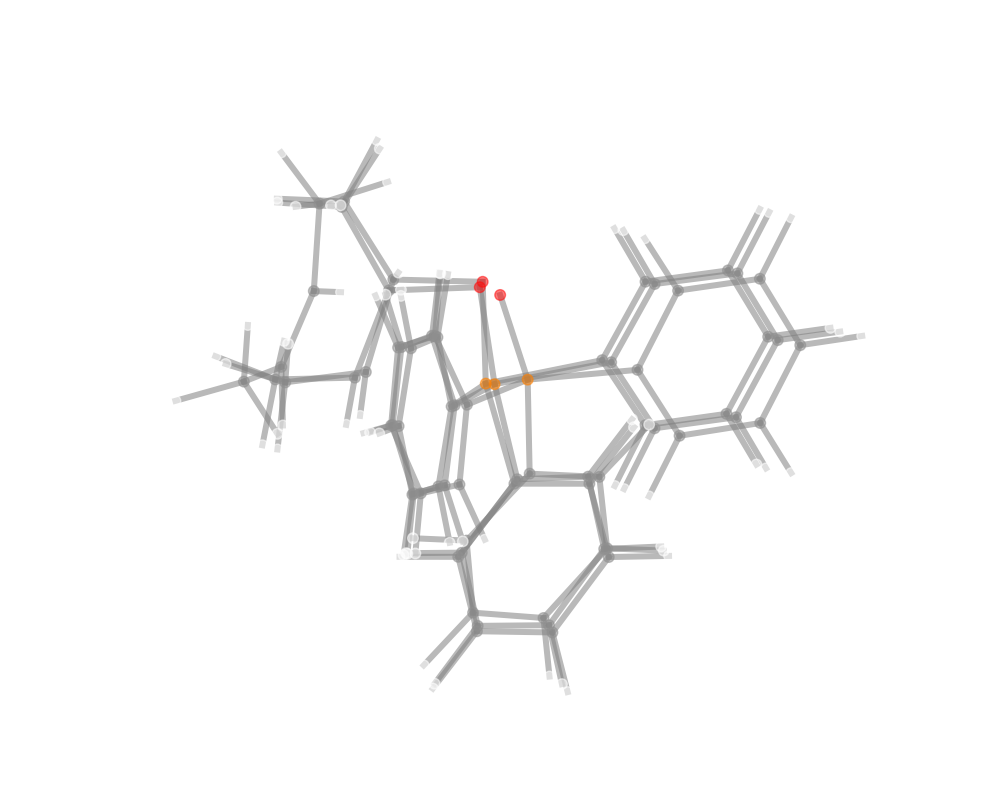

In [9]:
jsons = open_xyz_files("DA.xyz")
superimposed_jsons = superimpose(jsons, option="aa")
plot_overlay(superimposed_jsons, colorby="atom")

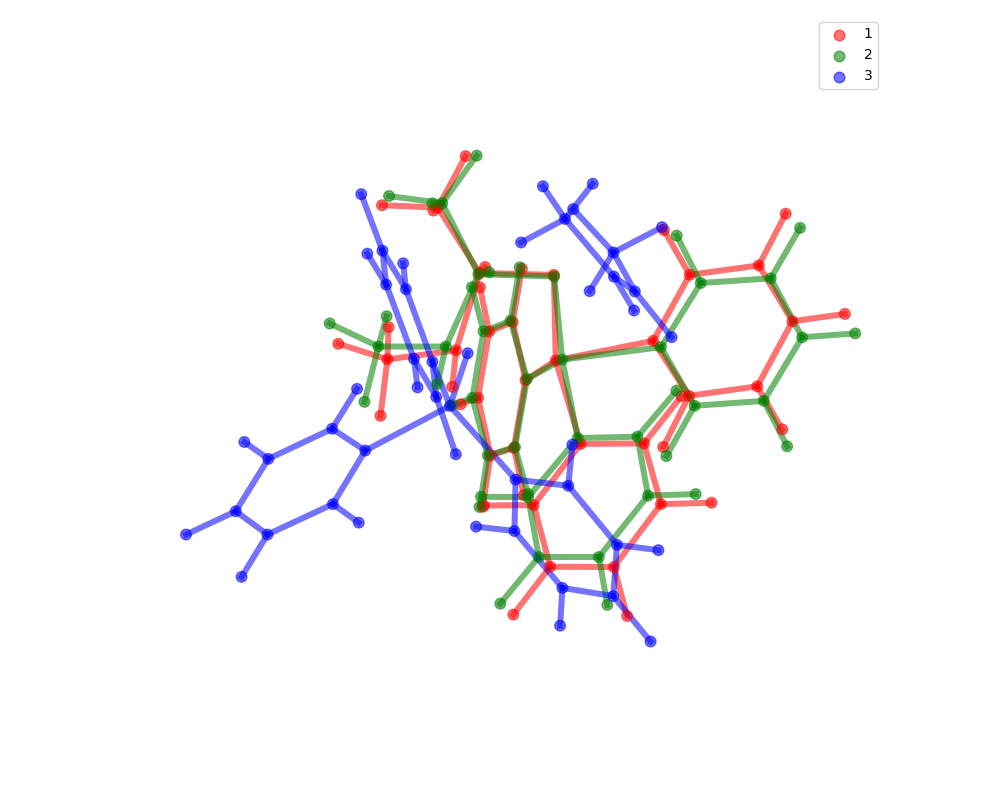

In [15]:
jsons = open_xyz_files("DA.xyz")
superimposed_jsons = superimpose(jsons, option="a", option_param=[[1,2,3,4,5,6,7,8], [1,2,3,4,5,6,7,8], [6,7,8,1,2,3,4,5]])
plot_overlay(superimposed_jsons, colorby="molecule", cmap=["red", "green", "blue"], legend=True)

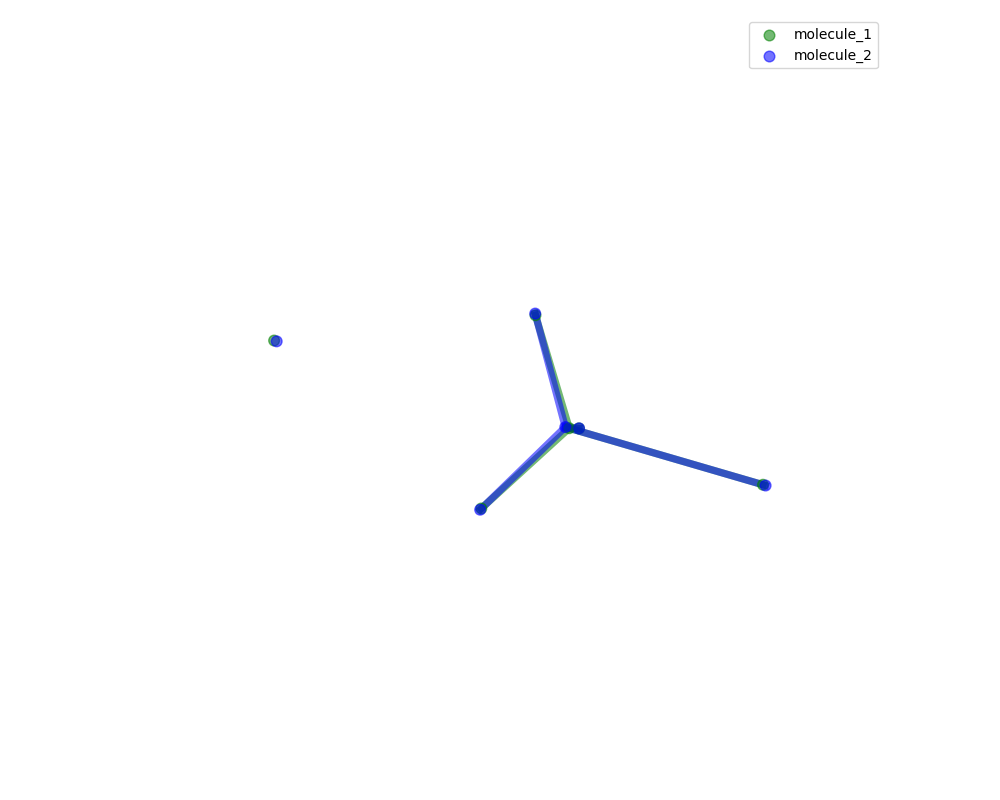

In [16]:
jsons = open_xyz_files([
{
    "name": "molecule_1",
    "coordinate": "sn2_1.xyz"
    },
{
    "name": "molecule_2",
    "coordinate": "sn2_2.xyz"
    }
  ])
superimposed_jsons = superimpose(jsons, option="aa")
plot_overlay(superimposed_jsons, colorby="molecule", cmap=["green", "blue"], legend=True)

<ipython-input-7-83e96d18eeb8>:553: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(*_xyz_format_jsons[mol_idx]["coordinate"][:, 1:].T,


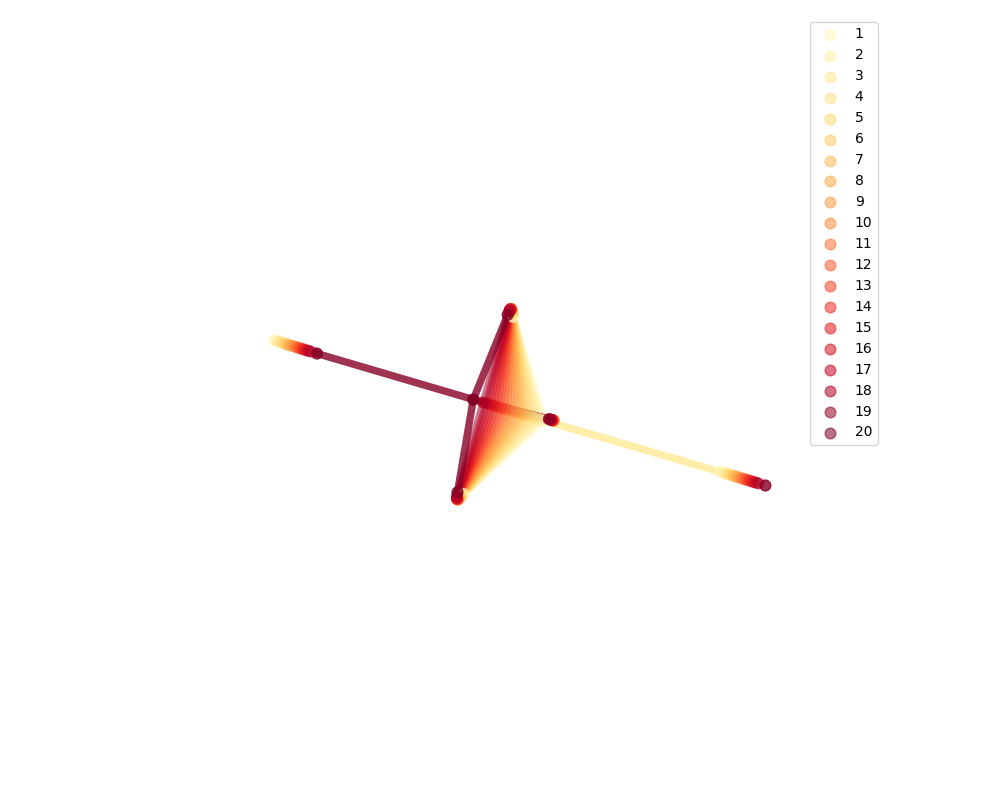

In [17]:
jsons = open_xyz_files("sn2.xyz")
superimposed_jsons = superimpose(jsons, option="aa")
plot_overlay(superimposed_jsons, colorby="molecule", cmap="YlOrRd", legend=True)

[WARNING] `legend`=True is not a applicable when colorby='atom'.


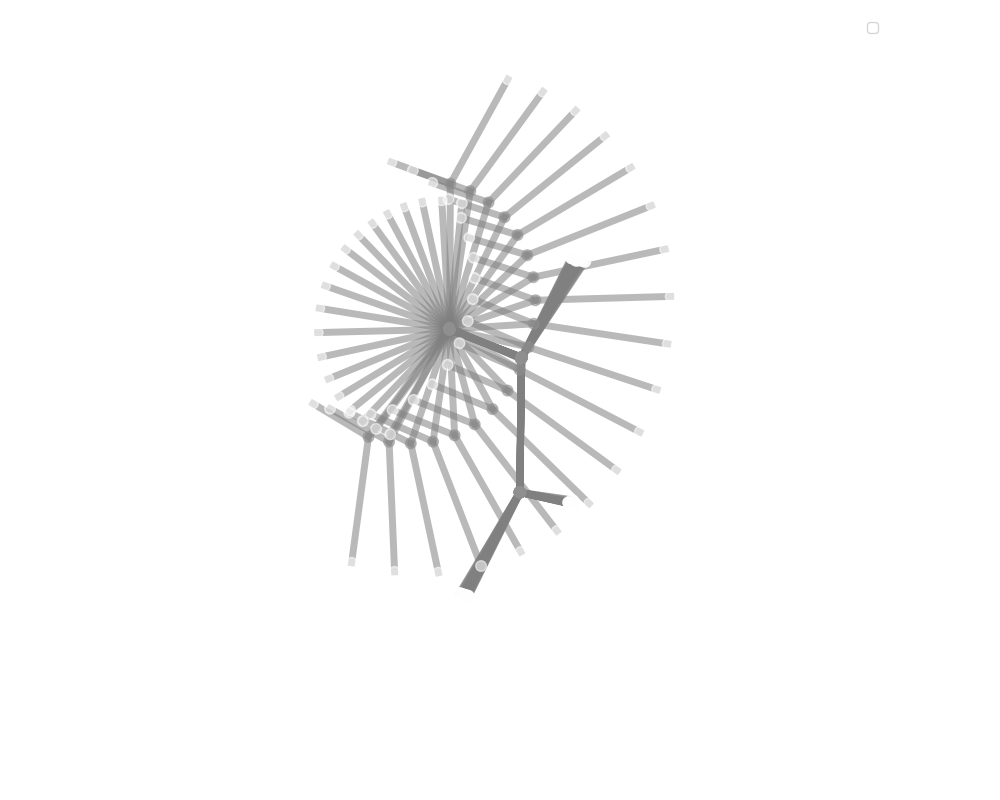

In [18]:
jsons = open_xyz_files("butadiene.xyz")
superimposed_jsons = superimpose(jsons, option="sa", option_param=[1, 2, 3])
plot_overlay(superimposed_jsons, colorby="atom", legend=True)

<ipython-input-7-83e96d18eeb8>:553: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(*_xyz_format_jsons[mol_idx]["coordinate"][:, 1:].T,


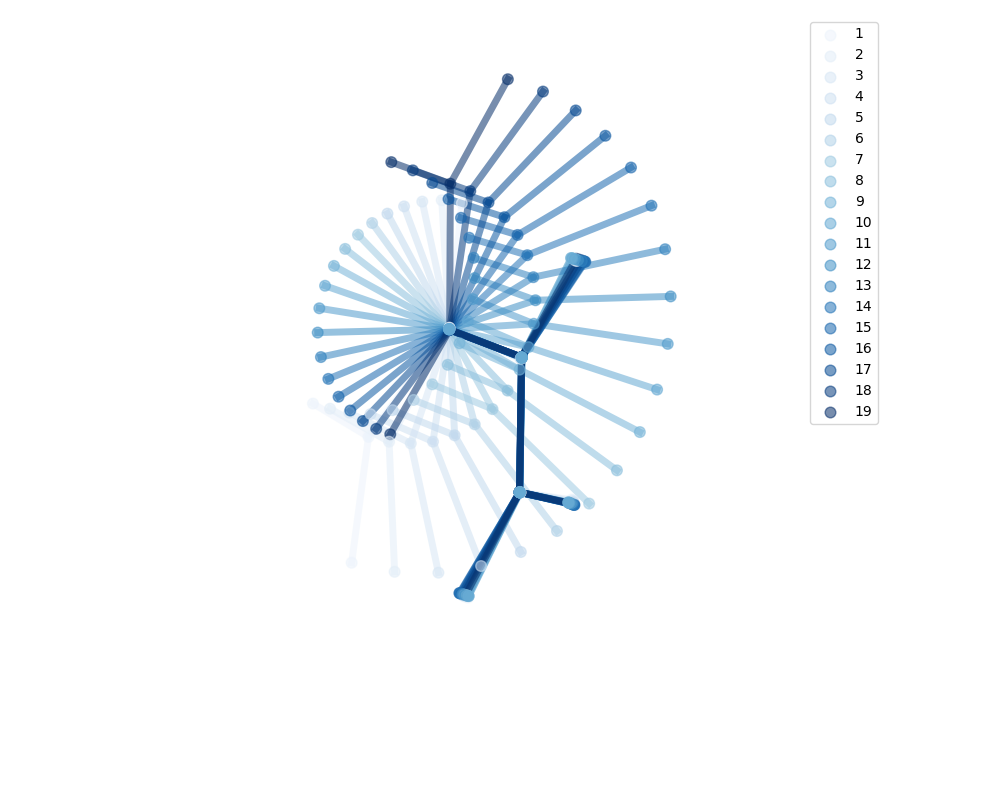

In [19]:
jsons = open_xyz_files("butadiene.xyz")
superimposed_jsons = superimpose(jsons, option="sa", option_param=[1, 2, 3])
plot_overlay(superimposed_jsons, colorby="molecule", cmap="Blues", legend=True)